### Clouds : test clouds 3D with NEXT MC events

G. Díaz, J. A Hernando


May 2021

In [1]:
#%matplotlib inline 

%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['image.cmap'] = 'rainbow'

In [3]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.hfit         as hfit

import clouds.clouds    as clouds
import clouds.pltclouds as pltclouds

#import bes.bes           as bes
#import bes.clouds        as clouds
#import next.reco.chits      as chits
#import next.reco.display    as nplay


In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Fri May  7 10:13:00 2021


In [5]:
#import os
import re
import glob
#import numpy  as np
#import pandas as pd
#import tables as tb

#import matplotlib
#from matplotlib import cm
#from matplotlib import pyplot as plt

#import clouds
#import pltclouds

In [6]:
get_file_number = lambda filename: int(re.findall("_[0-9]+_", filename)[0][1:-1])

def split_hits(hitsdf, weight="E"):
    
    xyz = hitsdf[["X", "Y", "Z"]].values
    x, y, z = xyz[:, 0], xyz[:, 1], xyz[:, 2]
    w = hitsdf[weight].values
    
    return x, y, z, w

# ojo
#fname = '/home/hernando/data/NEW/MC/bb0nu_esmeralda/map_8264.h5'
fname = '/Users/hernando/investigacion/NEXT/data/MC/NEW/bb0nu_esmeralda/map_8264.h5'
maps_te = pd.read_hdf(fname, "time_evolution")
dv = maps_te.dv.mean()

In [7]:
#datadir   = "/home/hernando/data/NEW/MC/bb0nu_esmeralda/"
datadir   = "/Users/hernando/investigacion/NEXT/data/MC/NEW/bb0nu_esmeralda/"
files     = glob.glob(datadir + '*.h5')
def file_number(file):
    fname = file .split('/')[-1]
    ifile = fname.split('_')[1]
    return str(ifile)
#print(files)
filenames = sorted(files, key = file_number)
print('total files', len(filenames))

total files 501


In [8]:
#filename = np.random.choice(filenames)
#print(filename)
#filename = '/home/hernando/data/NEW/MC/bb0nu_esmeralda/esmeralda_321_0nubb.h5'
#print("File number", get_file_number(filename))

In [319]:
# events good:  3214
# File number 125 , Event 1252
# filename, event  =  360 ,  3604
# filename, event  =  379 ,  3798
# filename, event  =  25 ,  256


# interesing problematic events
# filename, event  =  190 ,  1902

# Interesting events
# filename, event  =  490 ,  4901
# filename, event  =  449 ,  4493



In [379]:
israndom = True
filename = np.random.choice(filenames) if israndom else filename

CHITS_lowTh  = pd.read_hdf(filename, "/CHITS/lowTh") .groupby("event")
CHITS_highTh = pd.read_hdf(filename, "/CHITS/highTh").groupby("event")

MChits = pd.read_hdf(filename, "MC/hits").groupby("event_id")
data_events = pd.read_hdf(filename, "Run/events")
event       = np.random.choice(data_events["evt_number"]) if israndom else event
print('filename, event  = ', get_file_number(filename), ', ', event)

filename, event  =  30 ,  302


In [380]:
low  = CHITS_lowTh .get_group(event)
high = CHITS_highTh.get_group(event)
true = MChits      .get_group(event)

x, y, z, w = split_hits(low, weight="E")
coors = (x, y, z)
ene   = 1e-5 * w
steps = (10., 10., 2.)

xmc, ymc, zmc = true["x"].values, true["y"].values, dv*true["z"].values
enemc, timemc = true["energy"].values, true['time'].values
coorsmc = (xmc, ymc, zmc)

print('Energy MC ', np.sum(enemc), ', RC ', np.sum(ene))

Energy MC  2.4578304 , RC  2.3665861572647096


## Draw MC event

<IPython.core.display.Javascript object>


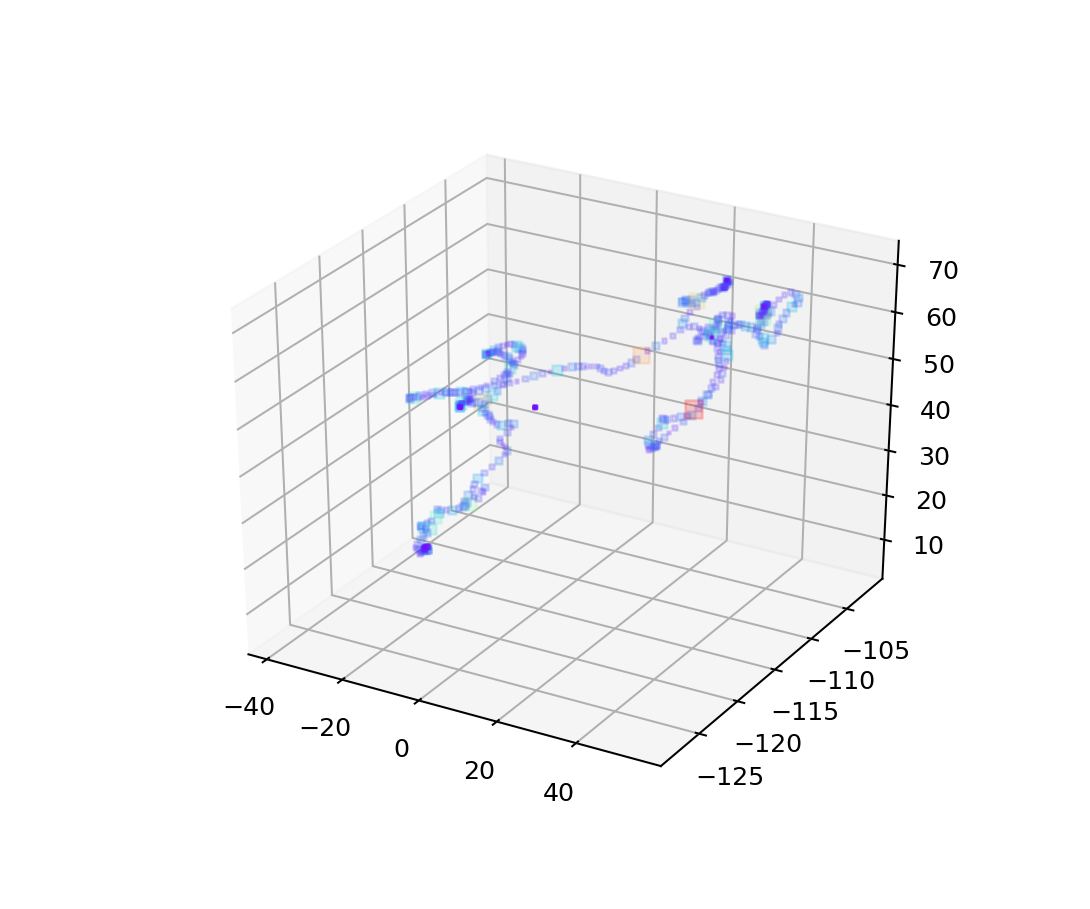

In [381]:
subplot = pltext.canvas(1, 1)
plt.gcf().add_subplot(1, 1 ,1, projection = '3d')
scalemc = enemc/np.max(enemc)
plt.gca().scatter(xmc, ymc, zmc, c = scalemc , s = 50 * scalemc, marker = 's', alpha = 0.2);

<IPython.core.display.Javascript object>


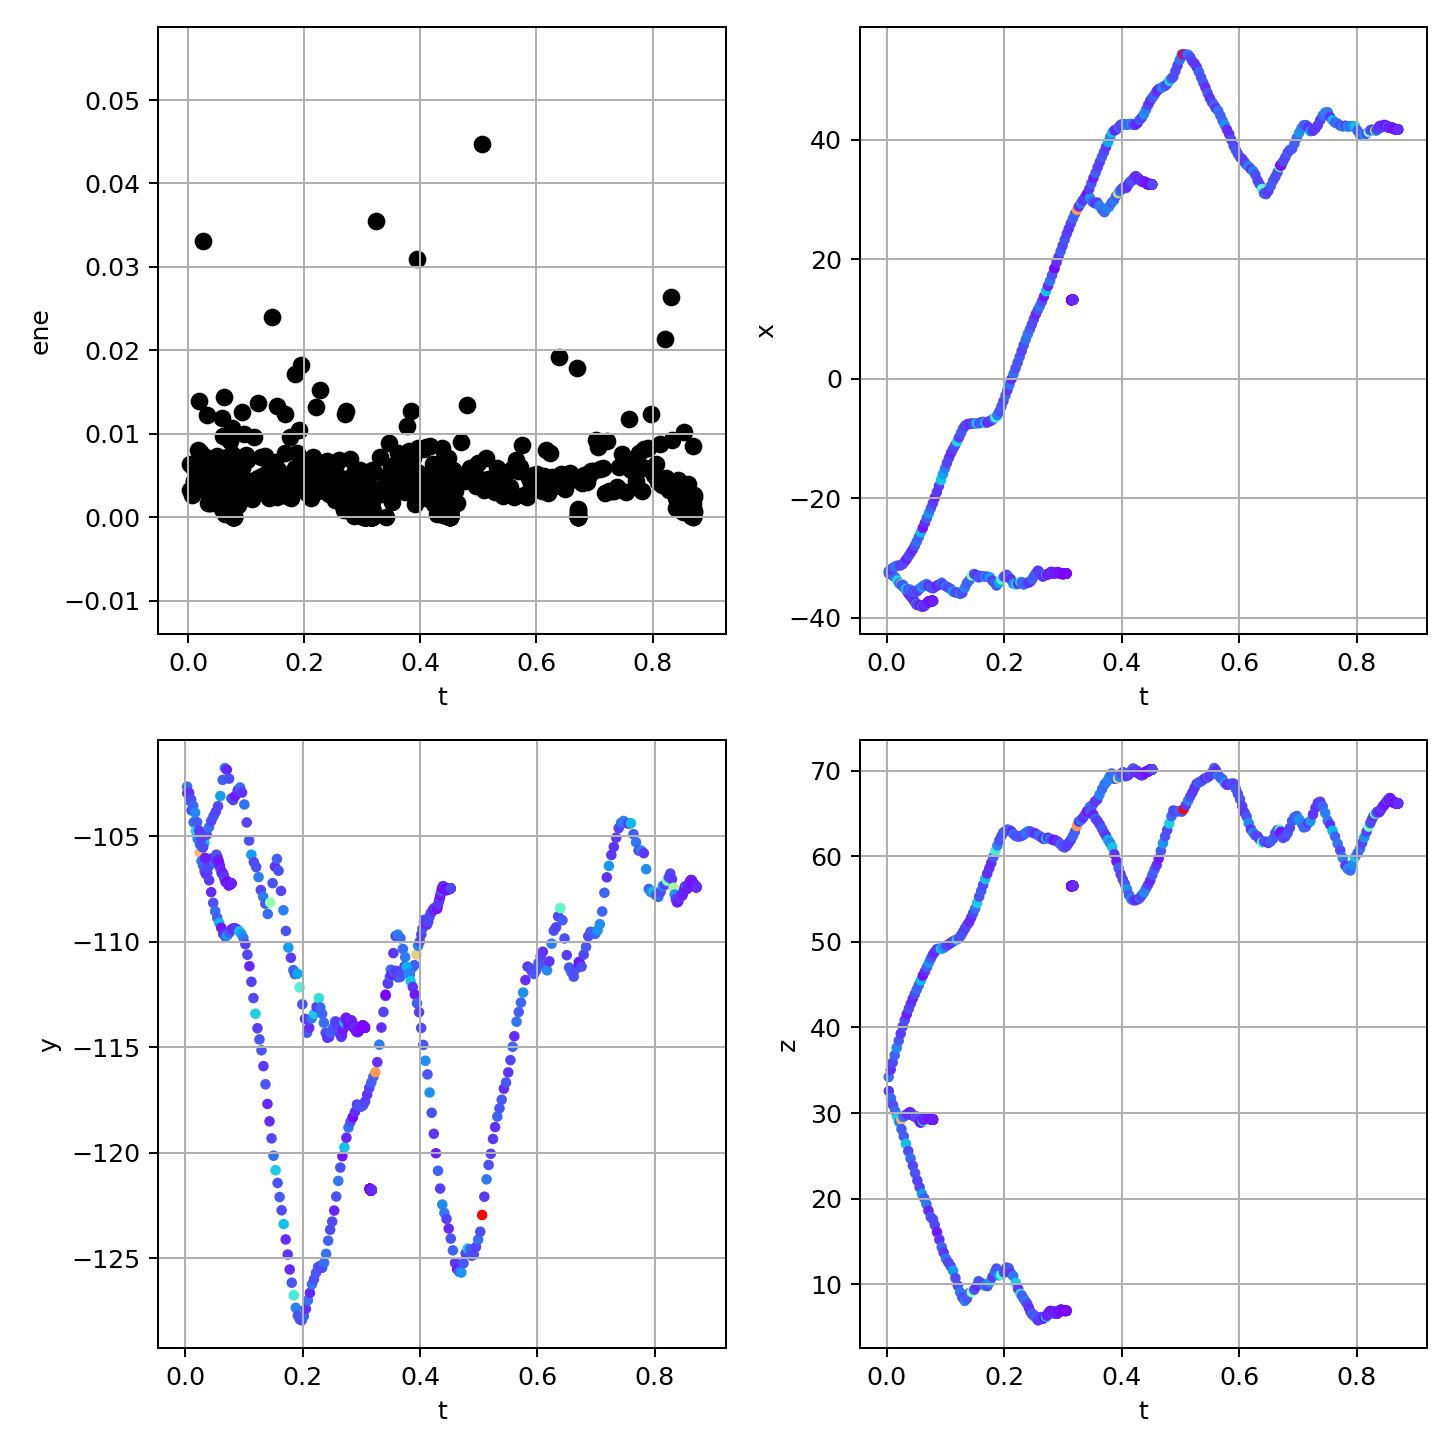

In [382]:
pltclouds.plot_tview(coorsmc, enemc, timemc)

## Draw Reco

<IPython.core.display.Javascript object>


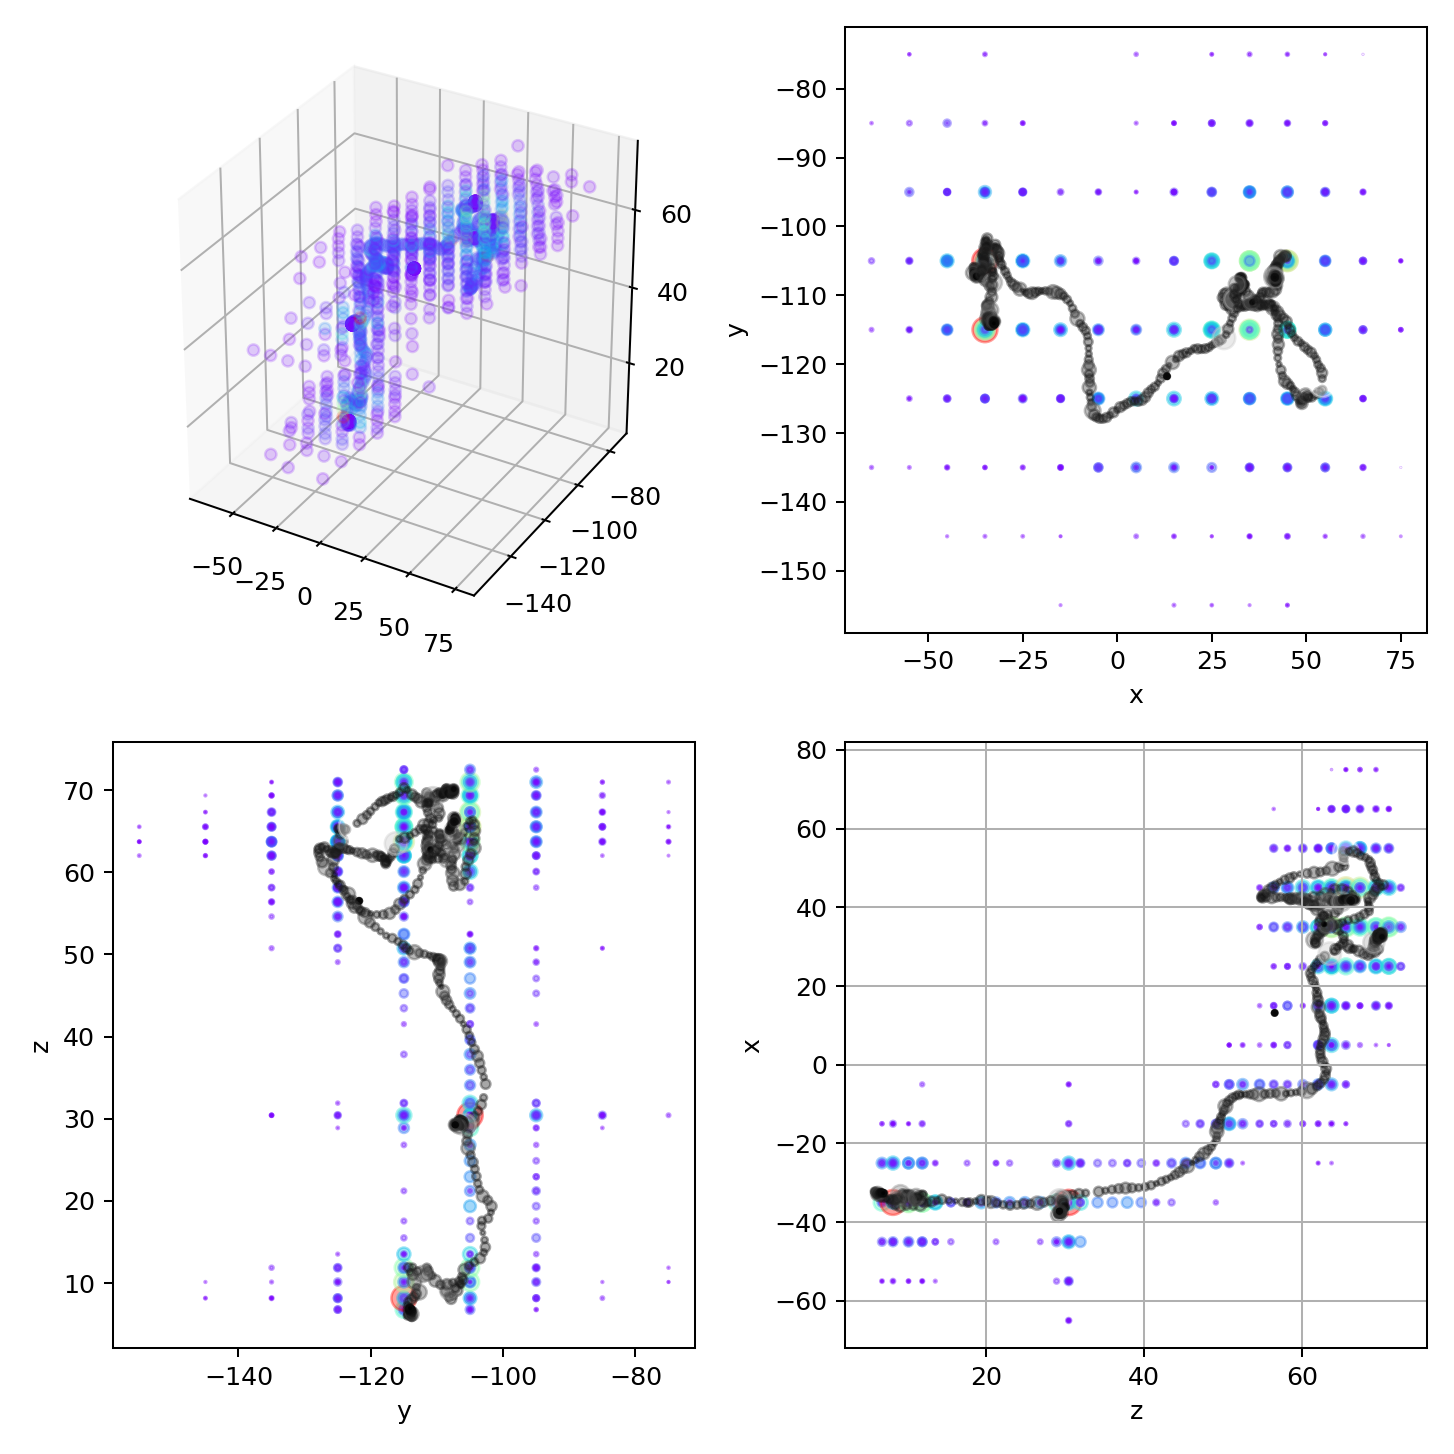

In [383]:
pltclouds.plot_xyview(coors, ene, coorsmc, enemc)

## Clouds 

In [384]:
cut   = 10.
steps = (10., 10., 4.)
bins, mask, cells, df = clouds.clouds(coors, steps, ene, cut)
cenemc = clouds.cells_value(bins, mask, coorsmc, enemc)
df['mcene']  = cenemc
df['istrue'] = cenemc > 0

In [385]:
#df

In [386]:
xana = clouds.analysis(df)
for key in xana.keys():
    print(key, xana[key])

eeisnodesuccess 5
eeisnodefailures 3
eeisnodeeff 0.625
eeisbordersuccess 10
eeisborderfailures 32
eeisbordereff 0.23809523809523808
eeispasssuccess 6
eeispassfailures 2
eeispasseff 0.75
eeisridgesuccess 16
eeisridgefailures 5
eeisridgeeff 0.7619047619047619
eiscoresuccess 48
eiscorefailures 307
eiscoreeff 0.1352112676056338


<IPython.core.display.Javascript object>


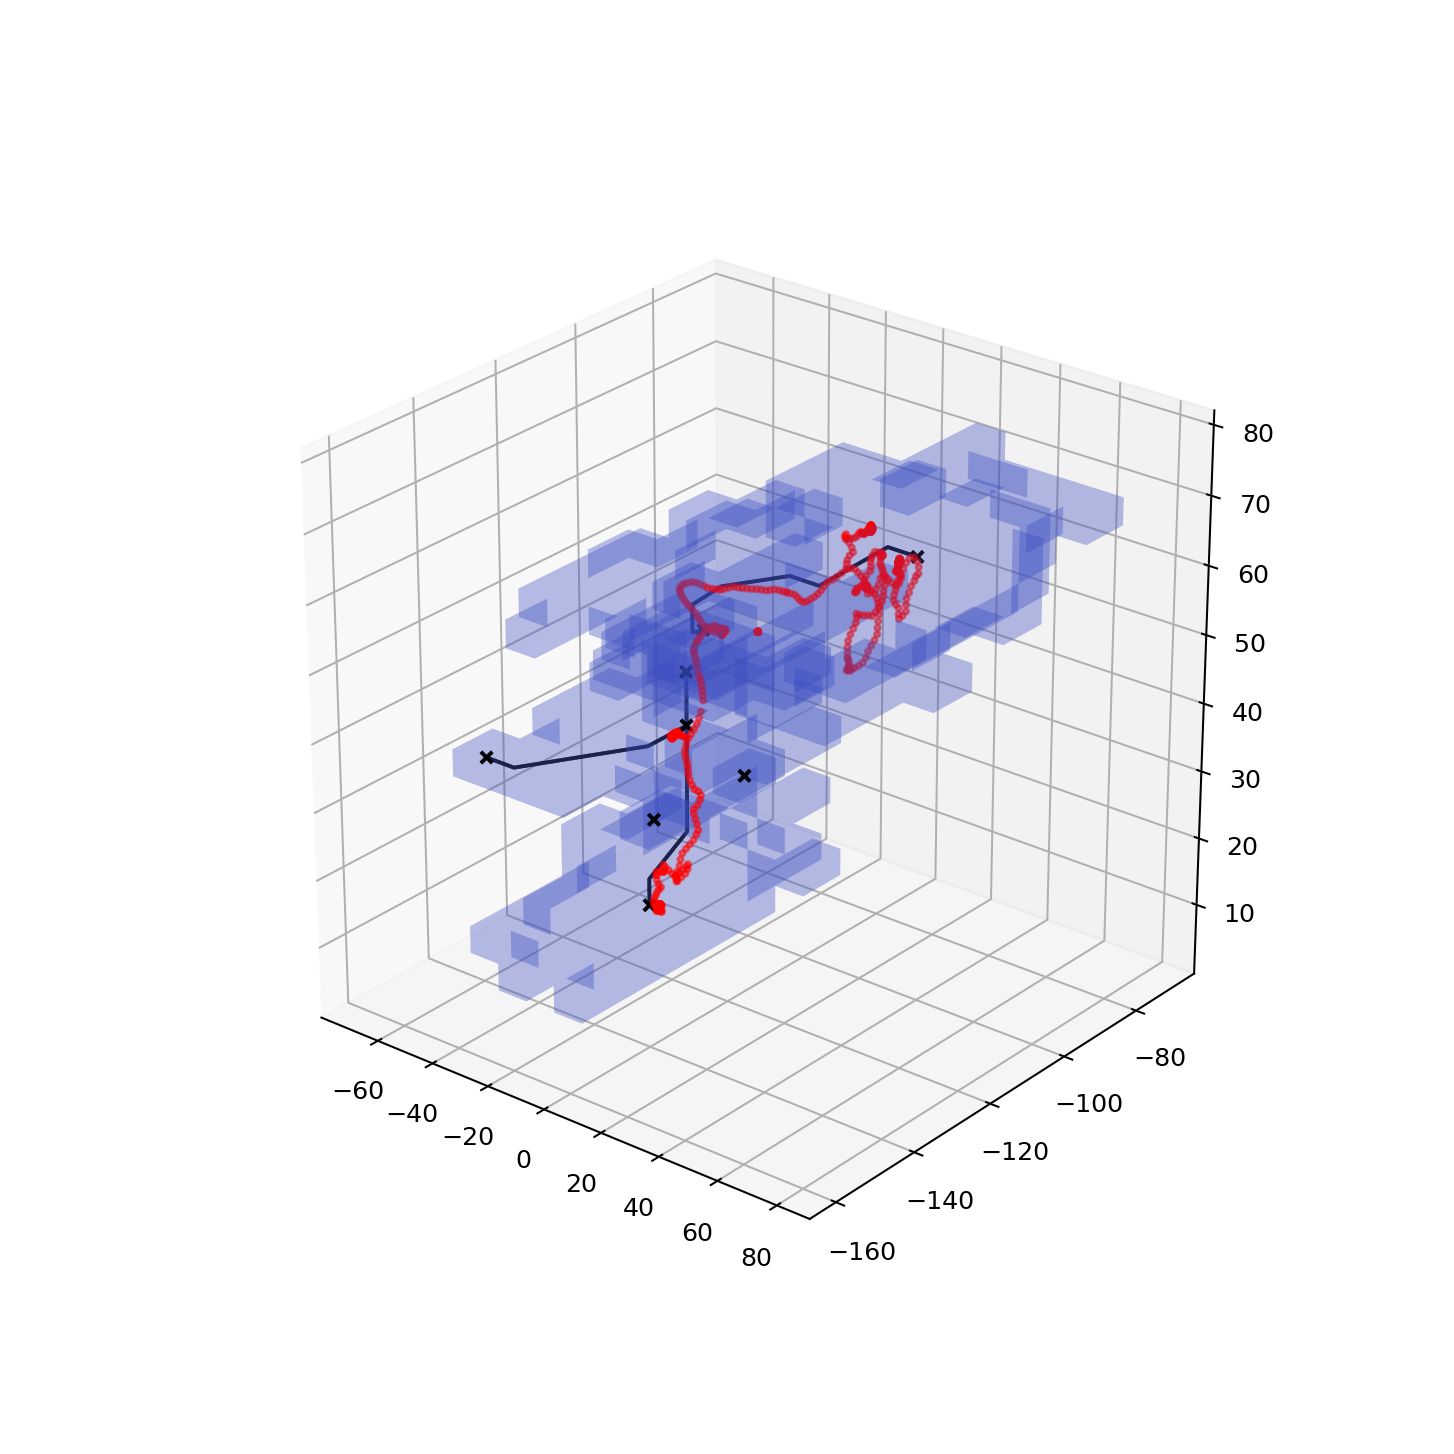

In [387]:
plt.figure(figsize = (8, 8));
#draw = pltclouds.drawer(cells, bins, df)
draw = pltclouds.draw_cloud(cells, bins, df, 'e')
plt.gca().scatter(xmc, ymc, zmc, c = 'red' , marker = '.', alpha = 0.5);
#pltclouds.rotate()
opts = {'ispass': {'marker':'d', 'c':'black'}}
draw(iscore = False, ridge = False, cloud = False, link = False, ispass = False, rotate = False, opts = opts)
#pltclouds.rotate();

## Graph

In [388]:
from matplotlib import animation

#def ani_init_()

#def ani_step_(i):

#def animate(i):
#    ax.view_init(elev=30., azim=i)
#    return fig

<IPython.core.display.Javascript object>


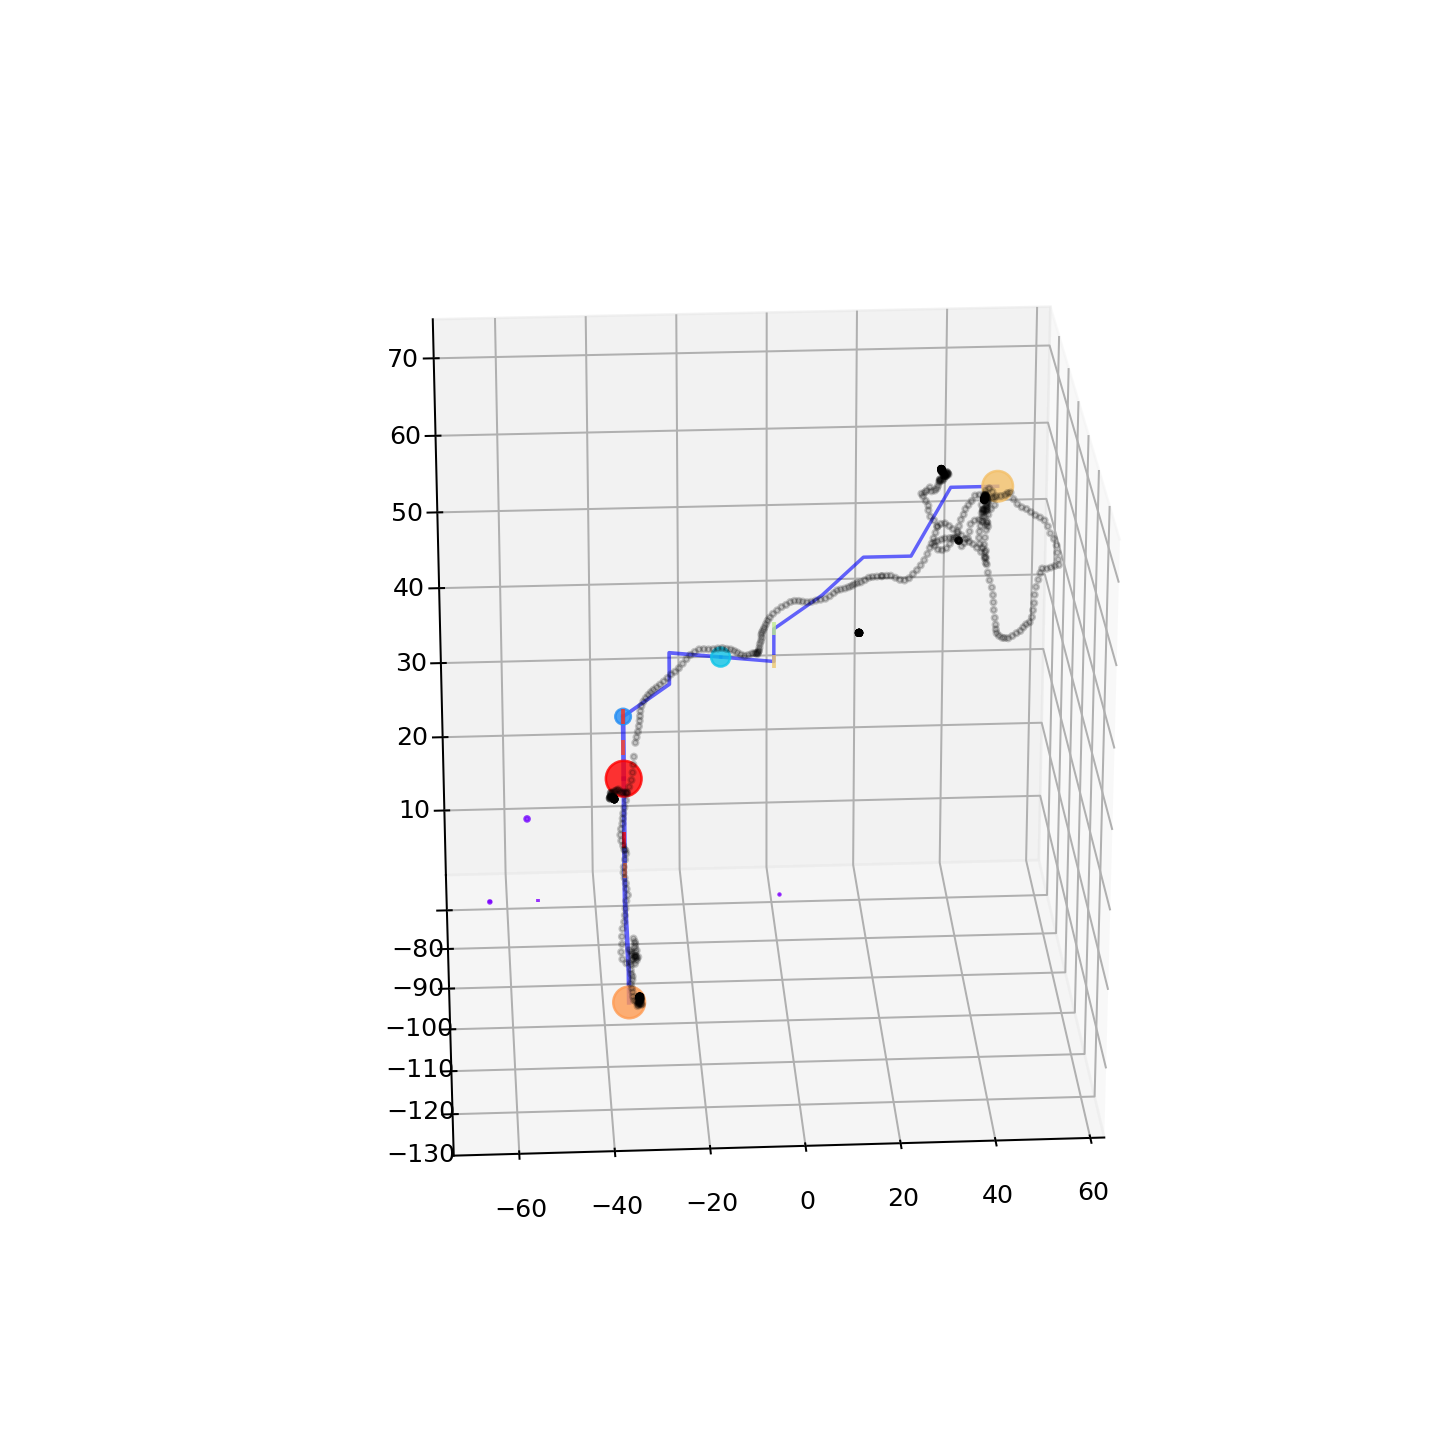

[(150, 149), (56, 57), (60, 61), (101, 61)]


In [389]:
prefix    = 'e'
cenes     = df[prefix + 'value']   .values
cnode     = df[prefix + 'node']    .values
cisnode   = df[prefix + 'isnode']  .values
cispass   = df[prefix + 'ispass']  .values
cisborder = df[prefix + 'isborder'].values
ciscore   = df['iscore']           .values
cepath    = df[prefix + 'path']    .values
celgrad   = df[prefix + 'lgrad']   .values
clpath    = df[prefix + 'link']    .values

enodes, nnodes, elinks, nlinks = clouds._graph_matrix(bins, mask, cells, cenes, cnode, cisborder)
links = None
#links = clouds._graph_links_shortestdist(elinks, nlinks)
plt.figure(figsize = (8, 8));
pltclouds.draw_graph(cells, cenes, cepath, cisnode, cispass, nlinks, links = links)
plt.gca().scatter(xmc, ymc, zmc, c = 'black' , marker = '.', alpha = 0.2);
#pltclouds.plot_rotate()

In [377]:
print(nlinks)

[[ -1  -1  84 246  -1  -1  -1  84  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1 315  -1  -1]
 [ 35  -1  -1 139  -1  -1  -1  41  -1  -1  -1  -1]
 [245  -1 211  -1  -1 306  -1 245  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1 203 175  -1  -1  -1 282  -1]
 [ -1  -1  -1 324 204  -1  -1  -1  -1  -1 322  -1]
 [ -1  -1  -1  -1 174  -1  -1  -1 198  -1  -1  -1]
 [ 50  -1  50 141  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1 197  -1  -1 318  -1  -1]
 [ -1 316  -1  -1  -1  -1  -1  -1 220  -1  -1  -1]
 [ -1  -1  -1  -1 373 321  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]]


In [378]:
ulinks = (100.*(elinks + elinks.T)).astype(int)
print(ulinks)

[[ 0  0 25 16  0  0  0 52  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 38  0  0]
 [25  0  0 37  0  0  0 65  0  0  0  0]
 [16  0 37  0  0 20  0 22  0  0  0  0]
 [ 0  0  0  0  0 20 46  0  0  0 38  0]
 [ 0  0  0 20 20  0  0  0  0  0 31  0]
 [ 0  0  0  0 46  0  0  0 45  0  0  0]
 [52  0 65 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0 44  0  0]
 [ 0 38  0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0 38 31  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0]]


### Notes

   * nodes - energy, lap vs degree
    
   * nodes with more than 2 links, the weak energy links, plot strength, laplacian, (true/false)

[ True  True  True  True False  True False  True False False False False
 False False]
[5 4 4 2 4 2 4 0 2 0 1 1 0 1]


<IPython.core.display.Javascript object>


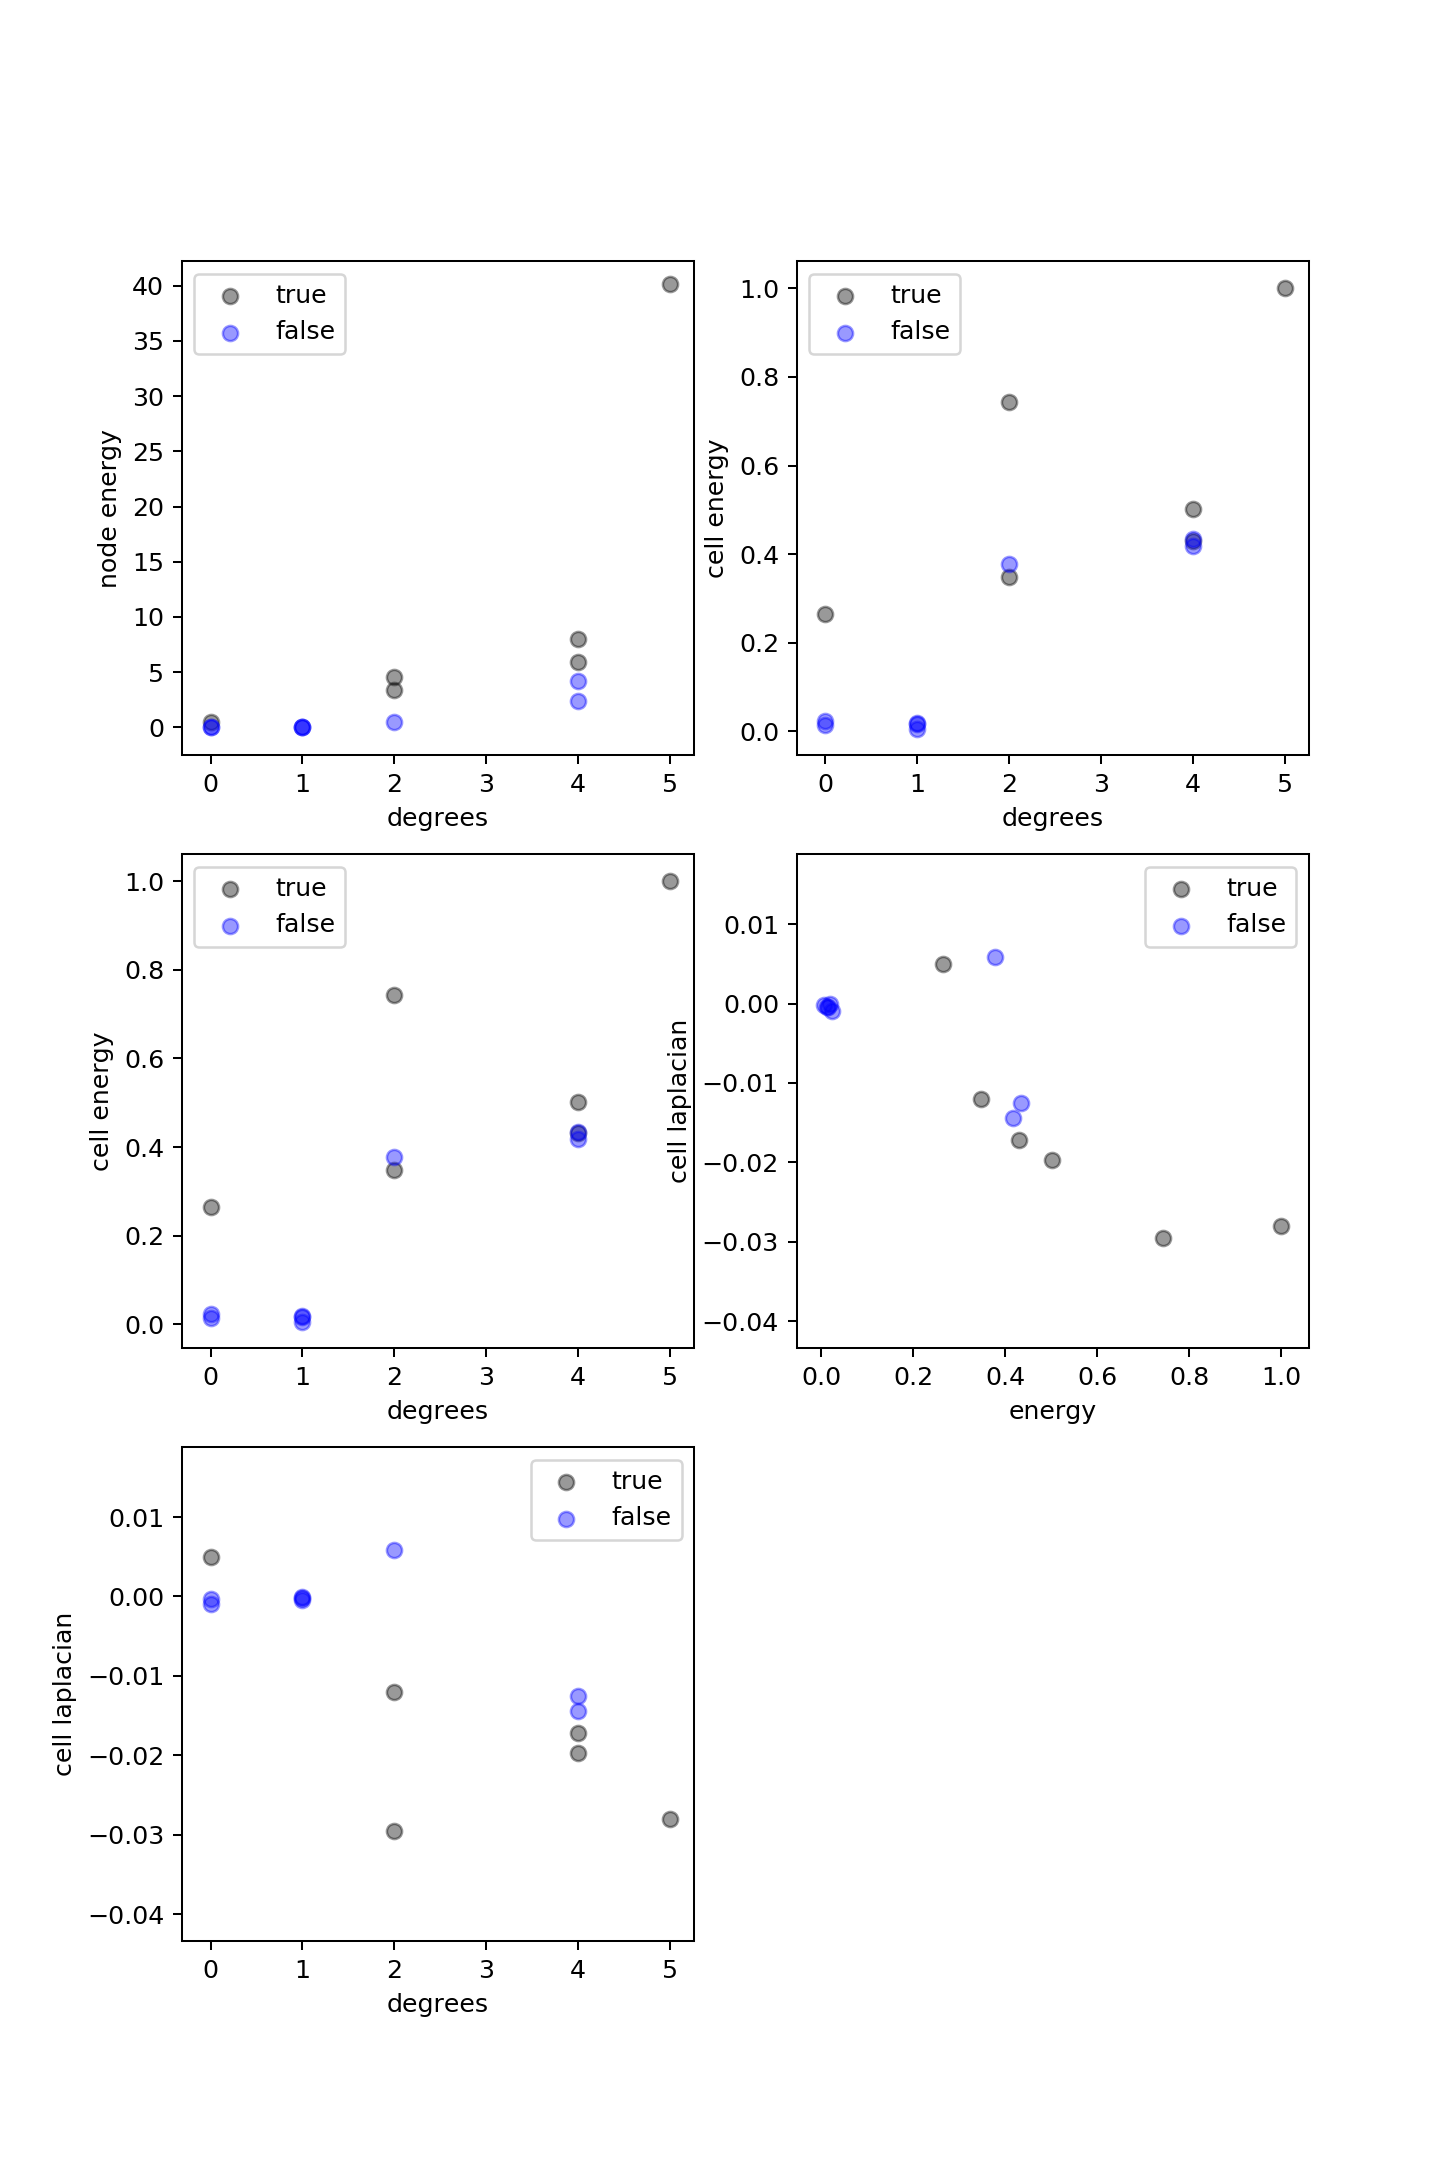

In [334]:
def _link_strength(nlinks, values, node_istrue = None):
    
    size = len(nlinks[0])
    istrue = np.full(size, True, bool) if node_istrue is None else node_istrue
    strens = []
    oks    = []
    size   = len(nlinks[0])
    for i in range(size):
        for j in range(size):
            if (j <= i): continue
            i0, j0 = nlinks[i, j], nlinks[j, i]
            if (i0 < 0) or (j0 < 0): continue
            stren = (values[i0] + values[i1])/2
            ok    = node_istrue[i] & node_istrue[j]
            strens.append(stren)
            oks   .append(ok)
    strens = np.array(strens)
    oks   = np.array(oks).astype(bool)
    return strens, oks


def plot_ana_nodes(nnodes, enodes, nlinks):
    energy  = df.energy   .values
    laplace = df.laplacian.values
    istrue  = df.istrue   .values
    nistrue = istrue[nnodes]
    #links   = clouds._graph_links(nlinks)

    print(nistrue)
    ndegrees = np.sum(nlinks >=0, 0)  
    print(ndegrees)

    plt.figure(figsize = (2 * 4, 3 * 4))
    #plt.scatter(ndegrees, nistrue, alpha = 0.1)
    plt.subplot(3, 2, 1)
    plt.scatter(ndegrees[nistrue] , enodes[nistrue], alpha = 0.4, label = 'true')
    plt.scatter(ndegrees[~nistrue], enodes[~nistrue], alpha = 0.4, label = 'false')
    plt.xlabel('degrees'); plt.ylabel('node energy'); plt.legend();

    plt.subplot(3, 2, 2)
    plt.scatter(ndegrees[nistrue] , energy[nnodes[ nistrue]], alpha = 0.4, label = 'true')
    plt.scatter(ndegrees[~nistrue], energy[nnodes[~nistrue]], alpha = 0.4, label = 'false')
    plt.xlabel('degrees'); plt.ylabel('cell energy'); plt.legend();

    plt.subplot(3, 2, 3)
    plt.scatter(ndegrees[nistrue] , energy[nnodes[ nistrue]], alpha = 0.4, label = 'true')
    plt.scatter(ndegrees[~nistrue], energy[nnodes[~nistrue]], alpha = 0.4, label = 'false')
    plt.xlabel('degrees'); plt.ylabel('cell energy'); plt.legend();

    plt.subplot(3, 2, 4)
    plt.scatter(energy[nnodes[ nistrue]], laplace[nnodes[ nistrue]], alpha = 0.4, label = 'true')
    plt.scatter(energy[nnodes[~nistrue]], laplace[nnodes[~nistrue]], alpha = 0.4, label = 'false')
    plt.xlabel('energy'); plt.ylabel('cell laplacian'); plt.legend();

    plt.subplot(3, 2, 5)
    plt.scatter(ndegrees[nistrue] , laplace[nnodes[ nistrue]], alpha = 0.4, label = 'true')
    plt.scatter(ndegrees[~nistrue], laplace[nnodes[~nistrue]], alpha = 0.4, label = 'false')
    plt.xlabel('degrees'); plt.ylabel('cell laplacian'); plt.legend();

    #strens, oks = _link_strength(nlinks, energy, nistrue)
    #plt.subplot(3, 2, 6)
    #print(oks)
    #print(strens[~oks])
    #plt.hist(strens[oks] , 20, label = 'True', histtype = 'step')
    #plt.hist(strens[~oks], 20, label = 'False', histtype = 'step')
    #plt.xlabel('strength'); plt.legend();
    
    return

plot_ana_nodes(nnodes, enodes, nlinks)

In [262]:
def _trim_nodes(nlinks, nenes, nene0 = 1.):
    degrees = np.sum(nlinks >=0, 1)
    size = len(nenes)
    change = False
    for i in range(size):
        ok = (degrees[i] == 1) & (nenes[i] < nene0)
        if (ok):
            nlinks[i, :] = -1
            nlinks[:, i] = -1
            print('removing ', i, nenes[i])
            change = True
    return change, nlinks

print('ene nodes ', enodes)
print('nlinks  :  \n', nlinks)
change = True
while change:
    change, nlinks = _trim_nodes(nlinks, enodes)
print('nlinks  :  \n', nlinks)

ene nodes  [1.56365149e+01 1.48192417e+01 5.97364963e+00 4.35536995e+00
 3.41363851e+00 3.03568170e-02 2.77579695e-02 9.98923777e-03
 6.05803492e-03 2.27988510e-03 4.76578929e-04]
nlinks  :  
 [[ -1 278 232 175 174 314  -1  -1  -1  -1  -1]
 [283  -1 242  -1 189  -1 157  -1  -1  -1  -1]
 [187 191  -1  -1 146  -1  59  -1  -1  -1  -1]
 [125  -1  -1  -1 125  -1  -1  -1  -1  -1  -1]
 [124 132 139  88  -1  -1  -1  -1  -1  -1  -1]
 [309  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1 107 107  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -1  -1  -1  -1  -1  -1  -1  -1  -1  -1]]
removing  5 0.030356817045641974
nlinks  :  
 [[ -1 278 232 175 174  -1  -1  -1  -1  -1  -1]
 [283  -1 242  -1 189  -1 157  -1  -1  -1  -1]
 [187 191  -1  -1 146  -1  59  -1  -1  -1  -1]
 [125  -1  -1  -1 125  -1  -1  -1  -1  -1  -1]
 [124 132 139  88  -1  -1  -1  -1  -1  -1  -1]
 [ -1  -

In [168]:
links    = clouds._graph_links_shortestdist(elinks, nlinks)
print(links)
paths    = [clouds.get_path_from_link(*ilink, cepath) for ilink in links]
segments = [clouds.get_segment(cells, path) for path in paths]

[(424, 358), (325, 334), (395, 321), (245, 308)]


<IPython.core.display.Javascript object>


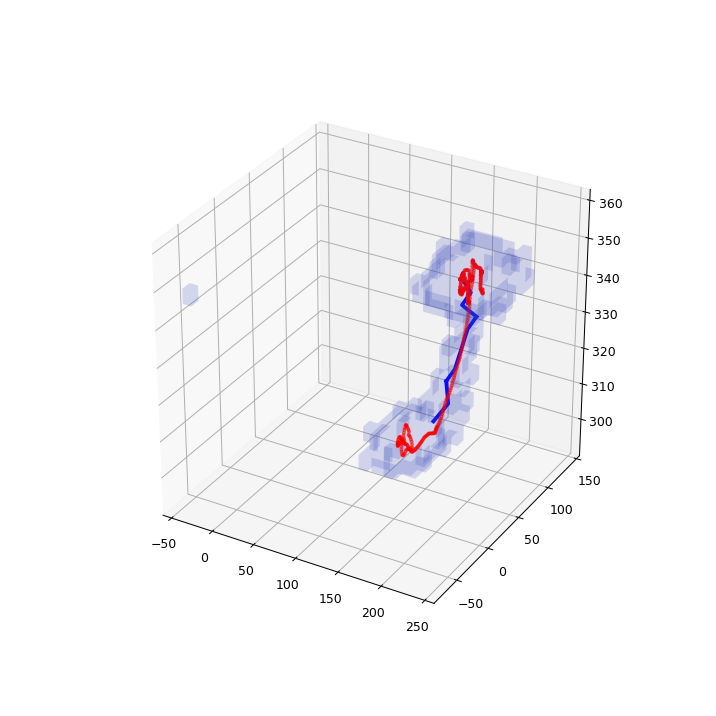

In [363]:
plt.figure(figsize = (8, 8))
opts = {'cloud' : {'alpha' : 0.1}, 'isnode' : {'marker' : 'X'}}
draw(cloud = True, ridge = False, opts = opts, isnode = True)
plt.gca().scatter(xmc, ymc, zmc, c = 'red' , marker = '.', alpha = 0.5);
for i, segment in enumerate(segments):
    plt.gca().plot(*segment, lw = 3, c = 'blue', label = str(i));

In [52]:
c = plt.cm.rainbow(0.5)
c

(0.503921568627451, 0.9999810273487268, 0.7049255469061473, 1.0)

In [192]:
def plot_analysis(df, name = 'e'):
    
    ene  = df.evalue.values
    lap  = df.pvalue.values
    
    true = df.istrue.values
    cells_types = (name + 'isnode', name +'isborder',
                   name + 'ispass', name +'isridge', 'iscore')
    
    subplot = pltext.canvas(2 * len(cells_types), 2, 4, 4)
    
    dat = {}
    for i, itype in enumerate(cells_types):
        vals  = df[itype].values  
        ntot  = np.sum(vals)
        yes   = vals & true
        noes  = vals & (~true)
        nyes  = np.sum(yes)
        nnoes = np.sum(noes)
        eff   = float(nyes/ntot) if ntot >0 else -1
        dat[name+itype+'success']  = nyes
        dat[name+itype+'failures'] = nnoes
        dat[name+itype+'eff']      = eff
        subplot(2 * i + 1)
        pltext.hist(ene[yes ], 50)
        pltext.hist(ene[noes], 50)
        plt.xlabel('ene')
        plt.title(itype)
        subplot(2 * i + 2)
        pltext.hist(lap[yes ], 50)
        pltext.hist(lap[noes], 50)
        plt.xlabel('lap')
        plt.title(itype)
        
    plt.tight_layout()
    

<IPython.core.display.Javascript object>


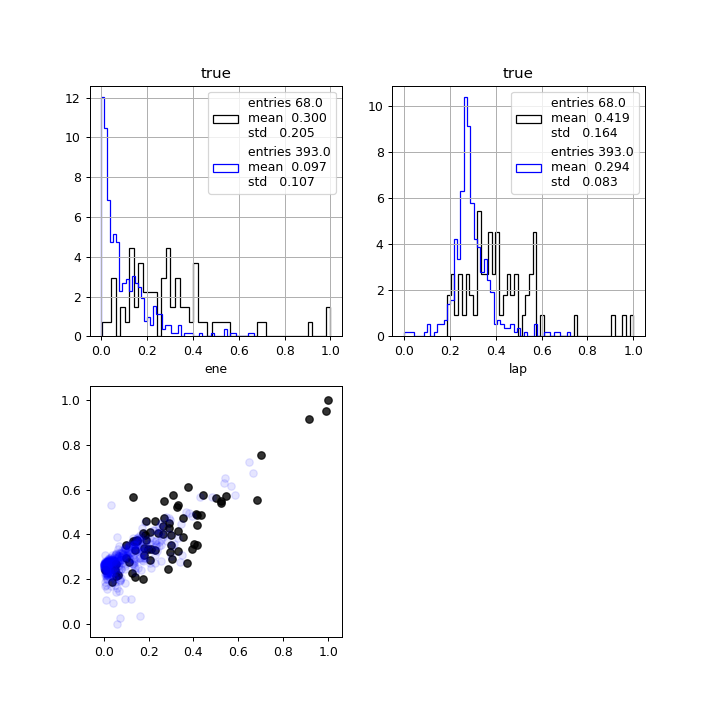

In [26]:
xene   = df.evalue.values
lap    = df.pvalue.values
istrue = df.istrue.values
subplot = pltext.canvas(4, 2, 4, 4)
subplot(1)
pltext.hist(xene[istrue] , 50, density = True)
pltext.hist(xene[~istrue], 50, density = True)
plt.xlabel('ene'); plt.title('true')
subplot(2)
pltext.hist(lap[istrue] , 50, density = True)
pltext.hist(lap[~istrue], 50, density = True)
plt.xlabel('lap'); plt.title('true')
subplot(3)
plt.scatter(xene[istrue] , lap[istrue] , alpha =.8)
plt.scatter(xene[~istrue], lap[~istrue], alpha =.1)

In [ ]:
plot_analysis(df)

In [ ]:
plt.figure(figsize = (8, 8))
draw(value = False, iscore = True, opts={'iscore':{'alpha':0.2}}, rotate = True)

In [ ]:
plt.figure(figsize = (8, 8));
#draw = pltclouds.drawer(cells, bins, df)
draw = pltclouds.drawer(cells, bins, df, 'p', plot = False)
plt.gca().scatter(xmc, ymc, zmc, c = 'red' , marker = '.', alpha = 0.5);
draw();
pltclouds.rotate()

In [ ]:
plt.figure(figsize = (6, 6));
draw(value = True, ispass = True, ridge = False)

In [ ]:
np.sum(df.eispass)

In [ ]:
draw(value = True)

In [ ]:
cells_select = pltclouds.cells_select

plt.figure(figsize = (10, 10))
plt.gca(projection = '3d')
evalue = df.pvalue.values
scale  = evalue

xx, yy, zz = np.meshgrid(*bins)
umask      = np.copy(mask)
filled     = np.swapaxes(umask, 0, 1).astype(bool)

norm      = colors  .Normalize(vmin=min(scale), vmax=max(scale), clip=True)
mapper    = colormap.ScalarMappable(norm=norm, cmap=colormap.coolwarm)
facecolor = mapper.to_rgba(scale)
#ax.voxels(x, y, z, filled, alpha=0.5)

plt.gca().voxels(xx, yy, zz, filled, alpha = 0.1, facecolor = facecolor);
plt.gca().scatter(*coorsmc, marker ='.', alpha = 0.2);
#plt.gca().scatter(*cells_select(cells, df.isdisper), marker = 's', alpha = 0.2);
plt.gca().scatter(*cells_select(cells, df.eisnode), marker = 'x', s = 50, alpha = 0.5);

eispass  = df.eispass.values
epath    = df.epath  .values
elink    = df.elink  .values

paths    = clouds.get_new_ridges(eispass, epath, elink)
for path in paths:
    pltclouds.draw_path(cells, path, c = 'black')

In [ ]:
cut = 0
_ana((x, z), (10.,  4.), ene, (xmc, zmc), enemc, ('x', 'z'), cut)
_ana((y, z), (10.,  4.), ene, (ymc, zmc), enemc, ('y', 'z'), cut)
_ana((x, y), (10., 10.), ene, (xmc, ymc), enemc, ('x', 'y'), cut)